In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("./R03_50")


In [3]:
dataset.drop(columns={"Unnamed: 0"}, inplace=True)

In [4]:
dataset.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,...,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..,label
0,-57.0,-13.0,-15.0,-12.0,-13.0,-8.0,-40.0,-54.0,-12.0,-14.0,...,-38.0,-42.0,-68.0,-76.0,-103.0,-51.0,-56.0,-124.0,-28.0,0
1,-49.0,-11.0,-10.0,-12.0,-19.0,-24.0,-58.0,-51.0,-19.0,-23.0,...,-55.0,-63.0,-82.0,-87.0,-99.0,-59.0,-70.0,-149.0,-40.0,0
2,-55.0,-17.0,-16.0,-19.0,-24.0,-29.0,-66.0,-61.0,-30.0,-36.0,...,-63.0,-72.0,-91.0,-92.0,-91.0,-67.0,-77.0,-153.0,-37.0,0
3,-73.0,-42.0,-40.0,-37.0,-37.0,-40.0,-71.0,-78.0,-53.0,-53.0,...,-52.0,-66.0,-100.0,-105.0,-105.0,-67.0,-72.0,-148.0,-26.0,0
4,-87.0,-53.0,-52.0,-51.0,-45.0,-43.0,-71.0,-87.0,-65.0,-64.0,...,-82.0,-90.0,-117.0,-119.0,-118.0,-75.0,-82.0,-161.0,-35.0,0


In [5]:
data = dataset.iloc[: ,:32]
data['label'] = dataset['label']

In [6]:
data.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,...,Fp2.,Af7.,Af3.,Afz.,Af4.,Af8.,F7..,F5..,F3..,label
0,-57.0,-13.0,-15.0,-12.0,-13.0,-8.0,-40.0,-54.0,-12.0,-14.0,...,-131.0,-54.0,-55.0,-51.0,-70.0,-106.0,-20.0,-33.0,-28.0,0
1,-49.0,-11.0,-10.0,-12.0,-19.0,-24.0,-58.0,-51.0,-19.0,-23.0,...,-130.0,-46.0,-48.0,-44.0,-70.0,-110.0,-17.0,-14.0,-32.0,0
2,-55.0,-17.0,-16.0,-19.0,-24.0,-29.0,-66.0,-61.0,-30.0,-36.0,...,-129.0,-52.0,-54.0,-50.0,-76.0,-109.0,-27.0,-21.0,-44.0,0
3,-73.0,-42.0,-40.0,-37.0,-37.0,-40.0,-71.0,-78.0,-53.0,-53.0,...,-140.0,-65.0,-67.0,-63.0,-86.0,-117.0,-35.0,-46.0,-52.0,0
4,-87.0,-53.0,-52.0,-51.0,-45.0,-43.0,-71.0,-87.0,-65.0,-64.0,...,-131.0,-57.0,-59.0,-60.0,-78.0,-103.0,-42.0,-31.0,-55.0,0


In [7]:
data.shape

(985952, 33)

In [8]:
from sklearn.model_selection import train_test_split
X = data.drop(columns={"label"})
Y = data['label']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
scaler = StandardScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reshaped = X_train_scaled.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_reshaped = X_test_scaled.reshape(X_test.shape[0],X_test.shape[1],1)




In [9]:
train_accuracies = []

In [10]:
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
epochs = 100
for epoch in range(epochs):
    print(f"epoch {epoch+1}/100")
    history = model.fit(X_train_reshaped, Y_train, epochs=1)  
    train_accuracies.append(history.history['acc'][0])



epoch 1/100
Train on 788761 samples
788761/788761 [==============================] - 86s 109us/sample - loss: 0.9653 - acc: 0.5393
epoch 2/100
Train on 788761 samples
788761/788761 [==============================] - 84s 106us/sample - loss: 0.8710 - acc: 0.5921
epoch 3/100
Train on 788761 samples
788761/788761 [==============================] - 84s 106us/sample - loss: 0.8218 - acc: 0.6186
epoch 4/100
Train on 788761 samples
788761/788761 [==============================] - 83s 106us/sample - loss: 0.7902 - acc: 0.6356
epoch 5/100
Train on 788761 samples
788761/788761 [==============================] - 83s 106us/sample - loss: 0.7672 - acc: 0.6482
epoch 6/100
Train on 788761 samples
788761/788761 [==============================] - 84s 106us/sample - loss: 0.7487 - acc: 0.6580
epoch 7/100
Train on 788761 samples
788761/788761 [==============================] - 83s 106us/sample - loss: 0.7348 - acc: 0.6653
epoch 8/100
Train on 788761 samples
788761/788761 [==============================] 

In [13]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped, Y_test, verbose=0)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.7630
Test Accuracy: 0.6754


In [14]:
print(train_accuracies)

[0.53934336, 0.59207034, 0.6186462, 0.63562095, 0.6481545, 0.65797114, 0.66528267, 0.6712997, 0.6758004, 0.68033284, 0.68377876, 0.68698376, 0.6891175, 0.69189906, 0.6933938, 0.69507873, 0.6968968, 0.6982838, 0.69982797, 0.70120734, 0.70209986, 0.7035604, 0.70426655, 0.70490175, 0.70594007, 0.7069087, 0.7074361, 0.708406, 0.7091248, 0.70940626, 0.7098158, 0.71046746, 0.71056634, 0.7112852, 0.71200526, 0.7118798, 0.7123425, 0.7132097, 0.7132642, 0.71330607, 0.7138943, 0.7138132, 0.7141238, 0.71463853, 0.7144357, 0.7149149, 0.7150924, 0.71470827, 0.715346, 0.715436, 0.71582395, 0.71529144, 0.7150937, 0.71577066, 0.71565276, 0.7158493, 0.71535355, 0.7155729, 0.71564263, 0.715171, 0.7149986, 0.7148591, 0.7147691, 0.7148084, 0.71433806, 0.71418846, 0.71421635, 0.7141339, 0.7136864, 0.71361035, 0.71435326, 0.71358246, 0.7127026, 0.71220434, 0.7130081, 0.7124363, 0.7115945, 0.71154886, 0.7115121, 0.7120788, 0.7107248, 0.71091115, 0.7108199, 0.7100922, 0.70940375, 0.7091616, 0.7089765, 0.70795

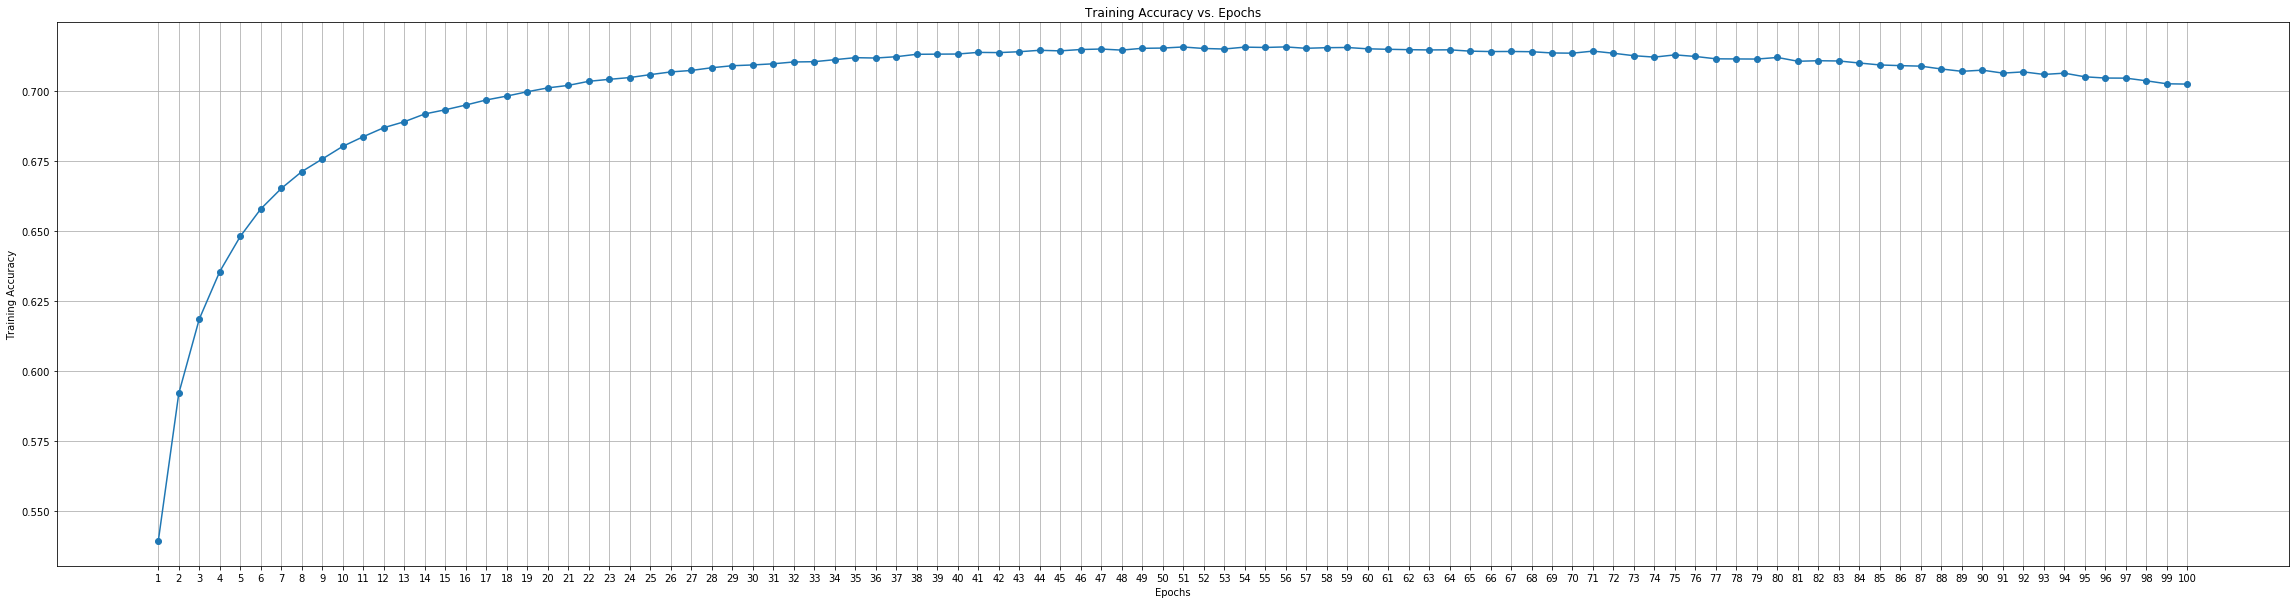

In [15]:
epochs_list = [i for i in range(1,epochs+1)]
plt.figure(figsize=(40,10))
plt.plot(epochs_list, train_accuracies, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs. Epochs')
plt.grid(True)
plt.xticks(range(1, 101))

plt.show()

In [16]:
print(sum(train_accuracies))

70.21365296840668


In [17]:
print(max(train_accuracies))

0.7158493
